In [1]:
# Import libraries and loading the csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
vehicles_clean = pd.read_csv("C:\\Users\\rachi\\OneDrive\\Desktop\\vehicles_allclean_imputer.csv")

In [3]:
vehicles_clean.shape

(266408, 20)

In [4]:
vehicles_clean = vehicles_clean.head(10000)

In [31]:
vehicles_clean.shape

(10000, 20)

In [56]:
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266408 entries, 0 to 266407
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            266408 non-null  int64  
 1   region        266408 non-null  object 
 2   price         266408 non-null  int64  
 3   year          266408 non-null  float64
 4   manufacturer  266408 non-null  object 
 5   model         266408 non-null  object 
 6   condition     187343 non-null  object 
 7   cylinders     266408 non-null  float64
 8   fuel          266408 non-null  object 
 9   odometer      266408 non-null  float64
 10  title_status  266408 non-null  object 
 11  transmission  266408 non-null  object 
 12  drive         266408 non-null  object 
 13  type          266408 non-null  object 
 14  paint_color   266408 non-null  object 
 15  description   266408 non-null  object 
 16  state         266408 non-null  object 
 17  lat           266408 non-null  float64
 18  long

In [21]:
vehicles_clean.isna().sum()

id                  0
region              0
price               0
year                0
manufacturer        0
model               0
condition       79065
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color         0
description         0
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [3]:
vehicles_clean.drop(['condition','id','posting_date','model','description'], axis=1,inplace = True)

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# define the features and target variables
X = vehicles_clean.drop('price', axis=1)
y = vehicles_clean['price']

# divide the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (159844, 14), (159844,)
Validation set shape: (53282, 14), (53282,)
Test set shape: (53282, 14), (53282,)


In [7]:
type(X_train)

pandas.core.frame.DataFrame

In [8]:
type(X_val)

pandas.core.frame.DataFrame

In [9]:
X_train.dtypes

region           object
year            float64
manufacturer     object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [5]:
cat_cols = ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'paint_color', 'state', 'drive']
num_cols = ['year','cylinders','odometer','lat','long','price']
# define the pipeline to perform one-hot encoding
ohe_pipeline = Pipeline([
    ('ohe_transformer', ColumnTransformer(
        transformers=[
            ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols)
        ],
        remainder='passthrough'
    ))
])

In [6]:
X_train = ohe_pipeline.fit_transform(X_train)
X_val = ohe_pipeline.transform(X_val)
X_test = ohe_pipeline.transform(X_test)

In [79]:
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, feature_names):
#         self.attribute_names = feature_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

In [80]:
# # Impute fills missing numerals by the median of the remaining data
# imputer = SimpleImputer(strategy="median")

# # The imputer is fit on the training data. It can then also be applied to the test data (without a refit)
# num_pipeline = Pipeline([
#         ('selector', DataFrameSelector(num_cols)),
#         ('imputer', SimpleImputer(strategy="median")),
#         ('std_scaler', StandardScaler())
#     ])

In [10]:
# X_train = num_pipeline.fit_transform(X_train)

numpy.ndarray

In [11]:
type(X_val)

numpy.ndarray

# Linear Regression

In [7]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_val_pred = linreg_model.predict(X_val)

In [9]:
mse_val = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

In [10]:
print('Mean squared error on validation data:', np.sqrt(mse_val))
print("R-squared:", r2)

Mean squared error on validation data: 8258.252225662645
R-squared: 0.682397500830674


In [11]:
y_val_pred = pd.DataFrame(y_val_pred, columns = ['Predicted Output'])
lin_reg_results = pd.concat([y_val_pred, y_val.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False) 

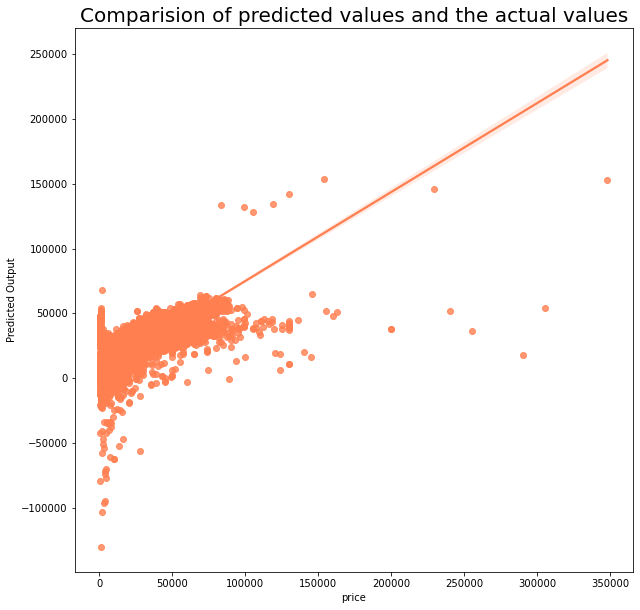

In [12]:
plt.figure(figsize = (10, 10))
sns.regplot(data = lin_reg_results, y = 'Predicted Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [18]:
#Lin Reg on log transformed target variable

In [19]:
# Log transform the target variable
y_train_log = np.log(y_train)

In [20]:
# Fit the model to the log-transformed target variable
linreg_model.fit(X_train, y_train_log)

LinearRegression()

In [21]:
# Predict the log-transformed car prices for the validation data
y_pred_log = linreg_model.predict(X_val)

In [22]:
# Transform the predicted values back to the original scale
y_pred = np.exp(y_pred_log)

In [23]:
# Evaluate the model's performance on the validation data
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [24]:
print('Mean squared error on validation data:', mse_val)
print("R-squared:", r2)

Mean squared error on validation data: 68198729.82243352
R-squared: 0.7113777198993783


In [25]:
y_pred = pd.DataFrame(y_pred, columns = ['Predicted Output'])
lin_reg_results = pd.concat([y_pred, y_val.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

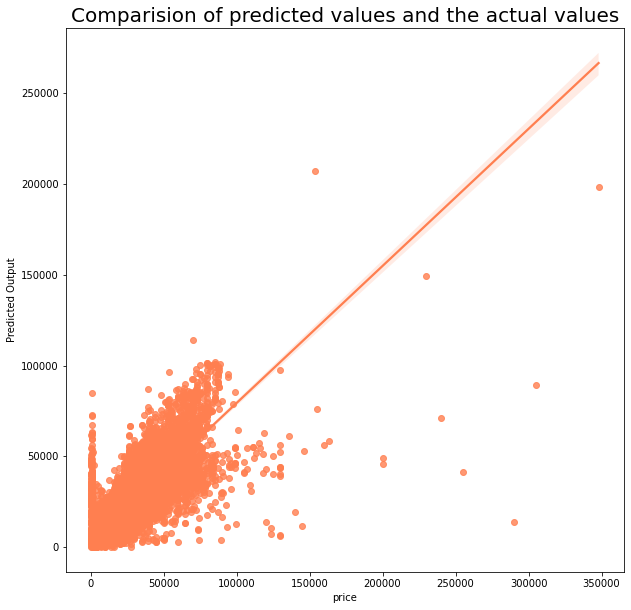

In [26]:
plt.figure(figsize = (10, 10))
sns.regplot(data = lin_reg_results, y = 'Predicted Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

# Polynomial Regression

In [27]:
# Create a PolynomialFeatures object to transform the features
poly = PolynomialFeatures(degree=2)

In [28]:
# Fit and transform the training data
# X_poly_train = poly.fit_transform(X_train)
#The kernel appears to have died. It will restart automatically.

# Decision Tree

In [85]:
dtr_model = DecisionTreeRegressor(splitter = 'random')
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(splitter='random')

In [86]:
dtr_predict_train = dtr_model.predict(X_train)

In [88]:
dtr_predict_val = dtr_model.predict(X_val)

In [92]:
rmse_train = sqrt(mean_squared_error(y_train, dtr_predict_train)) 
r2_train = r2_score(y_train, dtr_predict_train)
print(rmse_train)
print(r2_train)

124.8488463360927
0.9999261263934244


In [93]:
rmse_val = sqrt(mean_squared_error(y_val, dtr_predict_val)) 
r2_val = r2_score(y_val, dtr_predict_val)
print(rmse_val)
print(r2_val)

6124.774719287382
0.8253020280442003


In [94]:
dtr_predict_val = pd.DataFrame(dtr_predict_val, columns = ['Predicted Val Output'])

In [96]:
dtr_results = pd.concat([dtr_predict_val, y_val.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

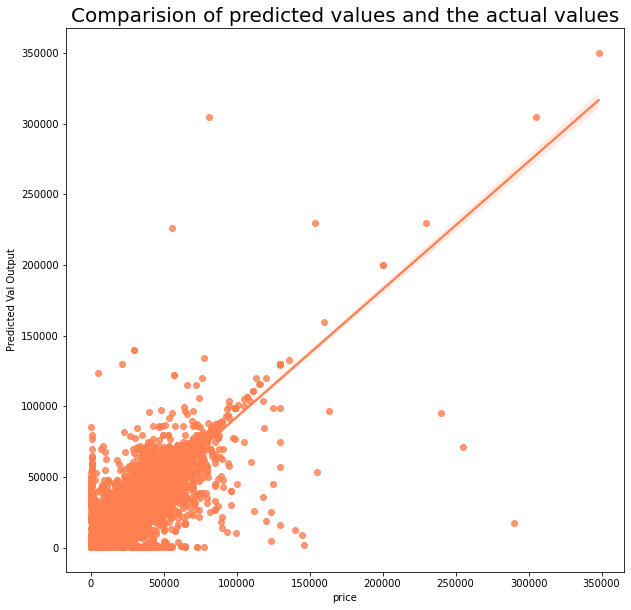

In [100]:
plt.figure(figsize = (10, 10))
sns.regplot(data = dtr_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
#Decision Treee on log transformed target variable

In [101]:
# Log transform the target variable
y_train_log = np.log(y_train)
# y_val_log = np.log(y_val)

In [104]:
# Fit the model to the log-transformed target variable
dtr_model.fit(X_train, y_train_log)

DecisionTreeRegressor(splitter='random')

In [105]:
dtr_predict_train_log = dtr_model.predict(X_train)

In [106]:
dtr_predict_val_log = dtr_model.predict(X_val)

In [112]:
predict_train = np.exp(dtr_predict_train_log)

In [113]:
predict_val = np.exp(dtr_predict_val_log)

In [114]:
rmse_train = sqrt(mean_squared_error(y_train, predict_train)) 
r2_train = r2_score(y_train, predict_train)
print(rmse_train)
print(r2_train)

132.21190703139635
0.9999171559400869


In [115]:
rmse_val = sqrt(mean_squared_error(y_val, predict_val)) 
r2_val = r2_score(y_val, predict_val)
print(rmse_val)
print(r2_val)

# W/o log data 
# 6124.774719287382
# 0.8253020280442003

6186.807137043561
0.821745385735755


In [116]:
dtr_predict_val = pd.DataFrame(predict_val, columns = ['Predicted Val Output'])

In [117]:
dtr_results = pd.concat([dtr_predict_val, y_val.to_frame().
                         reset_index(drop = True)], axis = 1, ignore_index = False)

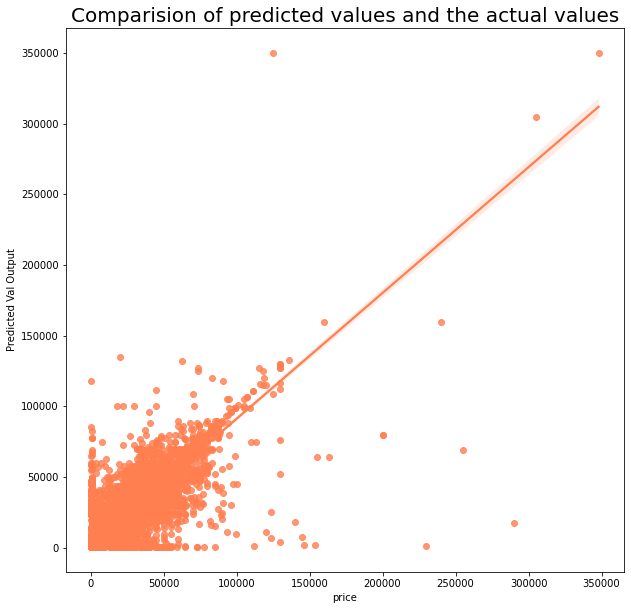

In [118]:
plt.figure(figsize = (10, 10))
sns.regplot(data = dtr_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

# Random Forest

In [163]:
# Create a random forest regressor with 100 trees
rfr_model = RandomForestRegressor(n_estimators=500, max_depth=10, bootstrap=True, random_state=42)

# max_depth -> 10 

In [164]:
# fit the model to the training data
rfr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [165]:
rfr_predict_train = rfr_model.predict(X_train)
rfr_predict_val = rfr_model.predict(X_val)

In [166]:
rmse_train = sqrt(mean_squared_error(y_train, rfr_predict_train)) 
r2_train = r2_score(y_train, rfr_predict_train)
print(rmse_train)
print(r2_train)

6170.09848358241
0.8195717956180831


In [167]:
rmse_val = sqrt(mean_squared_error(y_val, rfr_predict_val)) 
r2_val = r2_score(y_val, rfr_predict_val)
print(rmse_val)
print(r2_val)

6756.716283794451
0.7873922989817501


In [168]:
rfr_predict_val = pd.DataFrame(rfr_predict_val, columns = ['Predicted Val Output'])
rfr_results = pd.concat([rfr_predict_val, y_val.to_frame().
                         reset_index(drop = True)], axis = 1, ignore_index = False)

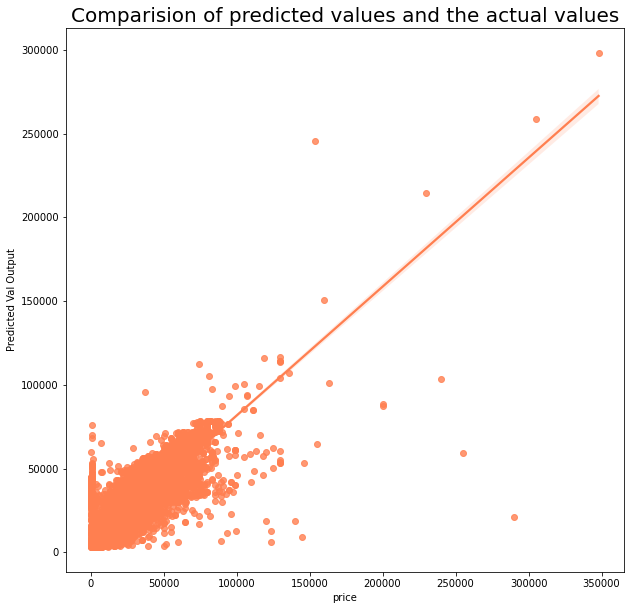

In [169]:
plt.figure(figsize = (10, 10))
sns.regplot(data = rfr_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
# On Log transformed 

In [10]:
# Log transform the target variable
y_train_log = np.log(y_train)
# y_val_log = np.log(y_val)

In [11]:
# Create a random forest regressor with 100 trees
rfr_model_log = RandomForestRegressor(n_estimators=500, max_depth=10, bootstrap=True, random_state=42)

# max_depth -> 10 

In [12]:
rfr_model_log.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [13]:
rfr_predict_train_log = rfr_model_log.predict(X_train)
rfr_predict_val_log = rfr_model_log.predict(X_val)

In [14]:
predict_train = np.exp(rfr_predict_train_log)
predict_val = np.exp(rfr_predict_val_log)

In [15]:
rmse_train = sqrt(mean_squared_error(y_train, predict_train)) 
r2_train = r2_score(y_train, predict_train)
print(rmse_train)
print(r2_train)

7080.494162323671
0.7623994875030272


In [16]:
rmse_val = sqrt(mean_squared_error(y_val, predict_val)) 
r2_val = r2_score(y_val, predict_val)
print(rmse_val)
print(r2_val)

7612.383232657272
0.7301335394928491


In [18]:
rfr_results = pd.concat([rfr_predict_val, y_val.to_frame().
                         reset_index(drop = True)], axis = 1, ignore_index = False)

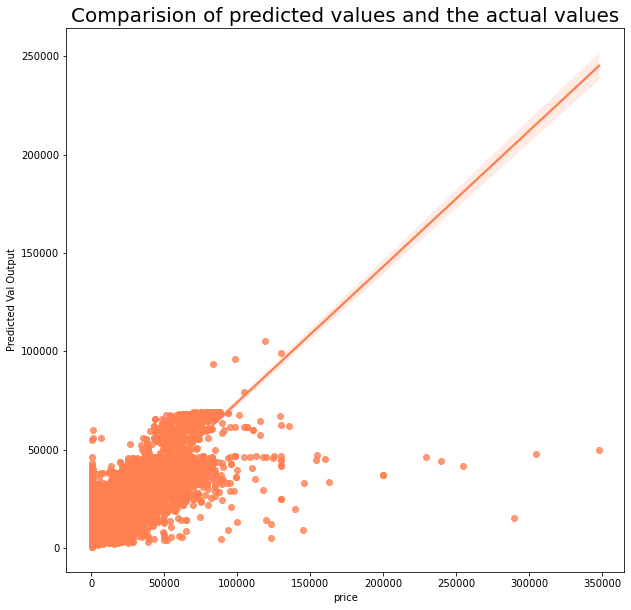

In [19]:
plt.figure(figsize = (10, 10))
sns.regplot(data = rfr_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

# XGBoost

In [7]:
from xgboost import XGBRegressor

In [10]:
xgb_model = XGBRegressor()

In [36]:
# fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
xgb_predict_train = xgb_model.predict(X_train)
xgb_predict_val = xgb_model.predict(X_val)

In [38]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

4706.4166370845305
0.8950213517845189


In [39]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

5530.851800951771
0.8575404171042413


In [42]:
xgb_predict_val = pd.DataFrame(xgb_predict_val, columns = ['Predicted Val Output'])
xgb_results = pd.concat([xgb_predict_val, y_val.to_frame().
                         reset_index(drop = True)], axis = 1, ignore_index = False)

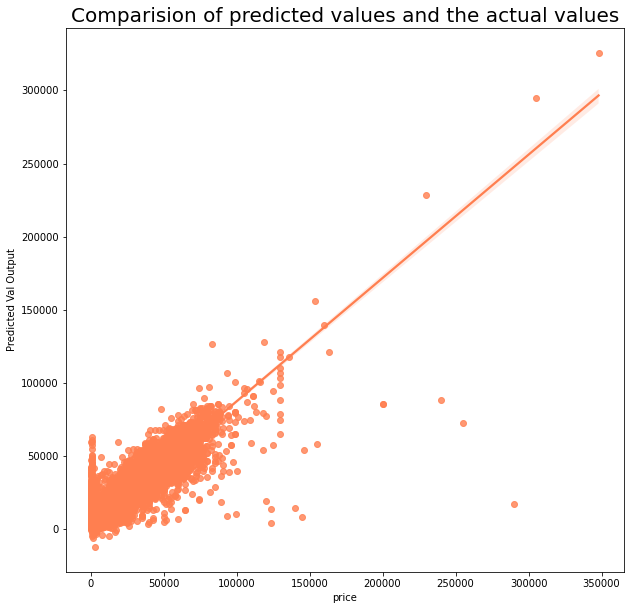

In [162]:
plt.figure(figsize = (10, 10))
sns.regplot(data = xgb_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [20]:
# Log transform the target variable
y_train_log = np.log(y_train)
# y_val_log = np.log(y_val)

In [24]:
xgb_model.fit(X_train, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
xgb_predict_train_log = xgb_model.predict(X_train)
xgb_predict_val_log = xgb_model.predict(X_val)

In [26]:
predict_train = np.exp(xgb_predict_train_log)
predict_val = np.exp(xgb_predict_val_log)

In [27]:
rmse_train = sqrt(mean_squared_error(y_train, predict_train)) 
r2_train = r2_score(y_train, predict_train)
print(rmse_train)
print(r2_train)

5342.721608277438
0.8647163459471545


In [28]:
rmse_val = sqrt(mean_squared_error(y_val, predict_val)) 
r2_val = r2_score(y_val, predict_val)
print(rmse_val)
print(r2_val)

6033.074090965075
0.8304940518470479


In [29]:
predict_val = pd.DataFrame(predict_val, columns = ['Predicted Val Output'])
xgb_results = pd.concat([predict_val, y_val.to_frame().
                         reset_index(drop = True)], axis = 1, ignore_index = False)

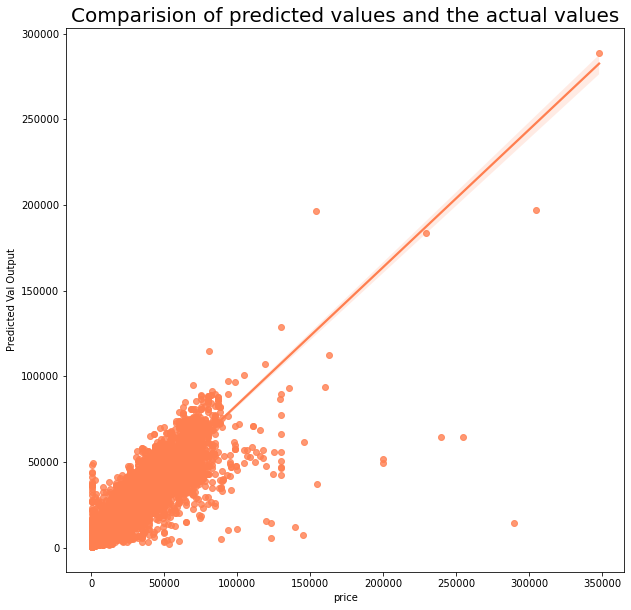

In [30]:
plt.figure(figsize = (10, 10))
sns.regplot(data = xgb_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [47]:
# Hyperparameters 
params = {'max_depth': [7,8,9],
          'learning_rate': [0.3, 0.35, 0.5],
          'n_estimators': [100, 200, 300],
          'gamma': [0, 0.2, 0.4],
          'reg_alpha': [0, 0.5, 5],
          'reg_lambda': [1, 10, 100],
          'min_child_weight':[1,3,5]
          }
# params = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
#     'n_estimators': [100, 500, 1000, 2000, 3000],
#     'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'reg_alpha': [0, 0.1, 0.5, 1, 10],
#     'reg_lambda': [0.01, 0.1, 1, 10, 100]
# }

In [48]:
# Define the randomized search
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=params,
    n_iter=5, cv=5, verbose=1, n_jobs=-1)

In [49]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                             

In [52]:
best_params = random_search.best_params_

In [53]:
best_params

{'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.2}

In [ ]:
######################################################################################

In [11]:
# Hyperparameters 
params = {'max_depth': [5,8,10],
          'learning_rate': [0.3, 0.35, 0.5],
          'n_estimators': [100, 200, 300],
          'gamma': [0, 0.2, 0.4],
          'reg_alpha': [0, 0.5, 5],
          'reg_lambda': [1, 10, 100],
          'min_child_weight':[1,3,5]
          }
# params = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
#     'n_estimators': [100, 500, 1000, 2000, 3000],
#     'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'reg_alpha': [0, 0.1, 0.5, 1, 10],
#     'reg_lambda': [0.01, 0.1, 1, 10, 100]
# }

In [12]:
# Define the randomized search
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=params,
    n_iter=5, cv=5, verbose=1, n_jobs=-1)

In [13]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                             

In [14]:
best_params = random_search.best_params_

In [15]:
best_params

{'reg_lambda': 100,
 'reg_alpha': 0.5,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0}

In [ ]:
# Grid search

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [17]:
param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 50],
    'max_depth': [random_search.best_params_['max_depth'] - 1, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 1],
    'learning_rate': [random_search.best_params_['learning_rate'] * 0.5, random_search.best_params_['learning_rate'], random_search.best_params_['learning_rate'] * 2],
    'gamma': [random_search.best_params_['gamma'] - 1, random_search.best_params_['gamma'], random_search.best_params_['gamma'] + 1],
    'reg_alpha': [random_search.best_params_['reg_alpha']],
    'reg_lambda': [random_search.best_params_['reg_lambda']],
    'min_child_weight': [random_search.best_params_['min_child_weight']]
}

In [18]:
# Perform grid search
gs = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

C:\Users\rachi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rachi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rachi\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\rachi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\rachi\anaconda3\lib\site-packages\xgboost\core.py", line 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [ ]:
# Randomized search with cross validation

In [8]:
params = {'max_depth': [6,7,8],
          'learning_rate': [0.3, 0.35, 0.4],
          'n_estimators': [50, 80, 100],
          'gamma': [0, 0.2, 0.4],
          'reg_alpha': [0.5,2, 5],
          'reg_lambda': [1, 10, 100],
          'min_child_weight':[5,8,10]
          }

In [9]:
xgb_model = XGBRegressor(objective='reg:squarederror')

In [10]:
# Define cross-validation strategy
from sklearn.model_selection import RandomizedSearchCV, KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [11]:
# Define randomized search with cross-validation

rand_search = RandomizedSearchCV(

    estimator=xgb_model,

    param_distributions=params,

    n_iter=10,

    scoring='neg_root_mean_squared_error',

    cv=cv,

    verbose=2,

    random_state=42,

    n_jobs=-1

)

In [12]:
# Fit randomized search on the data
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=No...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

In [13]:
# Print best hyperparameters and score

print('Best hyperparameters:', rand_search.best_params_)

print('Best score:', -rand_search.best_score_)


#Best hyperparameters: {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.4}
#Best score: 4641.497080913328

Best hyperparameters: {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.4}
Best score: 4892.426436010023


In [46]:
#####################################################################################################################

In [ ]:
# DEFAULT ONE 

# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#              gamma=0, gpu_id=-1, importance_type=None,
#              interaction_constraints='', learning_rate=0.300000012,
#              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
#              monotone_constraints='()', n_estimators=100, n_jobs=4,
#              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbosity=None)

In [14]:
# HYPERPARAMETER 1 --> Overfitting observed 

xgb_model1 = XGBRegressor(learning_rate = 0.5, n_estimators=500,max_depth=10)

In [15]:
xgb_model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [16]:
xgb_predict_train = xgb_model1.predict(X_train)
xgb_predict_val = xgb_model1.predict(X_val)

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

1213.576482980881
0.9930200142029003


In [18]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

4669.727973344124
0.8984474601832634


In [19]:
# HYPERPARAMETER 2 
# (with regularization parameters)
# reduced learning rate
# max depeth reduced

## overfitting 

xgb_model2 = XGBRegressor(learning_rate = 0.3, n_estimators=500,max_depth=8, reg_alpha=0.01, reg_lambda=1)

In [20]:
xgb_model2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
xgb_predict_train = xgb_model2.predict(X_train)
xgb_predict_val = xgb_model2.predict(X_val)

In [57]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

3541.797589215119
0.9405478300022208


In [23]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

4626.801005186859
0.9003059435076359


In [27]:
# HYPERPARAMETER 3


xgb_model3 = XGBRegressor(learning_rate = 0.4, n_estimators=500,max_depth=6, reg_alpha=0.05, reg_lambda=1)

In [28]:
xgb_model3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
xgb_predict_train = xgb_model3.predict(X_train)
xgb_predict_val = xgb_model3.predict(X_val)

In [30]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

3016.616752715849
0.9568718815019672


In [31]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

4825.565216113224
0.891556380690622


In [33]:
# HYPERPARAMETER 4
#. increase reg_alpha

xgb_model4 = XGBRegressor(learning_rate = 0.4, n_estimators=500,max_depth=6, reg_alpha=0.1, reg_lambda=1)

In [34]:
xgb_model4.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_predict_train = xgb_model4.predict(X_train)
xgb_predict_val = xgb_model4.predict(X_val)

In [36]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

3016.6176804722054
0.9568718549739754


In [37]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

4825.565089215959
0.8915563863940776


In [ ]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#              gamma=0, gpu_id=-1, importance_type=None,
#              interaction_constraints='', learning_rate=0.300000012,
#              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
#              monotone_constraints='()', n_estimators=100, n_jobs=4,
#              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbosity=None)

In [38]:
# HYPERPARAMETER 5
#. n_estimators

xgb_model5 = XGBRegressor(learning_rate = 0.4, n_estimators=200,max_depth=6, reg_alpha=0.1, reg_lambda=1)

In [39]:
xgb_model5.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgb_predict_train = xgb_model5.predict(X_train)
xgb_predict_val = xgb_model5.predict(X_val)

In [43]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

3881.226005457985
0.92860659421935


In [44]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

5144.076339856838
0.8767683012978753


In [51]:
# HYPERPARAMETER 6


xgb_model6 = XGBRegressor(max_depth=8,learning_rate = 0.5)
xgb_model6.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
xgb_predict_train = xgb_model6.predict(X_train)
xgb_predict_val = xgb_model6.predict(X_val)

In [53]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

3541.797589215119
0.9405478300022208


In [54]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

5065.571303380773
0.8805009395177857


In [59]:
# HYPERPARAMETER 7
xgb_model7 = XGBRegressor(learning_rate = 0.38, n_estimators=150,max_depth=8)
xgb_model7.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.38, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
xgb_predict_train = xgb_model7.predict(X_train)
xgb_predict_val = xgb_model7.predict(X_val)

In [61]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

3361.039777366422
0.9464613347753846


In [62]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

4952.568750310946
0.8857730315083657


In [30]:
# Hyperparameter 8
#  max_depth is set to 6 and min_child_weight is set to 5, 

xgb_model8 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xgb_model8.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
xgb_predict_train = xgb_model8.predict(X_train)
xgb_predict_val = xgb_model8.predict(X_val)

In [32]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

4794.864594251003
0.8910385360447632


In [33]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

5514.3448753929615
0.8583894944846029


In [34]:
# Hyperparameter 9
# learning rate increased  

xgb_model9 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.35,
             max_delta_step=0, max_depth=6, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xgb_model9.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.35, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
xgb_predict_train = xgb_model9.predict(X_train)
xgb_predict_val = xgb_model9.predict(X_val)

In [36]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

4689.573723968587
0.895771384152359


In [37]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

5478.555479384313
0.860221700419278


In [25]:
# Hyperparameter 9
# max_depth increased  

xgb_model10 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.35,
             max_delta_step=0, max_depth=8, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xgb_model10.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type=None, interaction_constraints='',
             learning_rate=0.35, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=8,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [26]:
xgb_predict_train = xgb_model10.predict(X_train)
xgb_predict_val = xgb_model10.predict(X_val)

In [27]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

4050.63662212119
0.9222381105088756


In [28]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

5130.226137678032
0.8774309999471275


In [29]:
xgb_predict_test = xgb_model10.predict(X_test)

In [31]:
rmse_test = sqrt(mean_squared_error(y_test, xgb_predict_test)) 
r2_test = r2_score(y_test, xgb_predict_test)
print(rmse_test)
print(r2_test)

4790.377424227776
0.8903517777626115


In [30]:
# HYPERPARAMETER 10 

#Best hyperparameters: {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.4}
#Best score: 4892.426436010023
#xgb_model10 = XGBRegressor(reg_lambda= 1,reg_alpha= 0.5,n_estimators= 100,
#                           min_child_weight= 5,max_depth= 8,learning_rate= 0.3,gamma= 0.4)

xgb_model10 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3,
             max_delta_step=0, max_depth=8, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0.5,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
xgb_model10.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
             grow_policy=None, importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=8,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [32]:
xgb_predict_train = xgb_model10.predict(X_train)
xgb_predict_val = xgb_model10.predict(X_val)

In [33]:
rmse_train = sqrt(mean_squared_error(y_train, xgb_predict_train)) 
r2_train = r2_score(y_train, xgb_predict_train)
print(rmse_train)
print(r2_train)

# 4706.4166370845305
# 0.8950213517845189

4165.109318087258
0.9177808384093702


In [34]:
rmse_val = sqrt(mean_squared_error(y_val, xgb_predict_val)) 
r2_val = r2_score(y_val, xgb_predict_val)
print(rmse_val)
print(r2_val)

# 5530.851800951771
# 0.8575404171042413

5187.109941214267
0.8746978476613695


In [35]:
xgb_predict_test = xgb_model10.predict(X_test)

In [36]:
rmse_test = sqrt(mean_squared_error(y_test, xgb_predict_test)) 
r2_test = r2_score(y_test, xgb_predict_test)
print(rmse_test)
print(r2_test)

4826.394731695634
0.8886967598415405


# ANN

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(25, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='linear')
])


2023-04-07 10:54:29.712698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 10:54:42.953077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


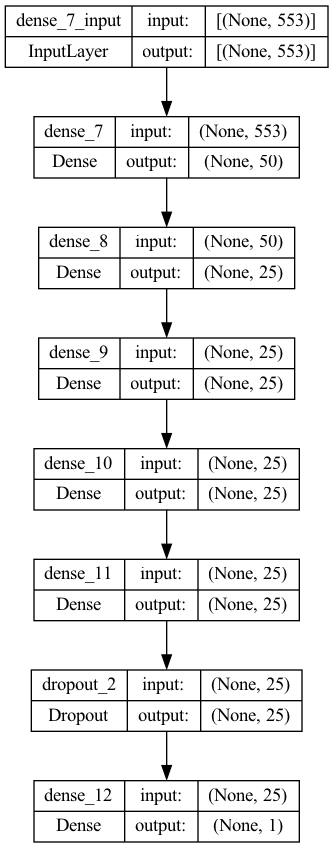

In [54]:
keras.utils.plot_model(model , to_file = 'model.png', show_shapes = True)

In [55]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

In [56]:
history = model.fit(X_train, y_train, batch_size=16, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
9991/9991 [==============================] - 29s 3ms/step - loss: 168358736.0000 - val_loss: 135715072.0000
Epoch 2/50
9991/9991 [==============================] - 27s 3ms/step - loss: 151998592.0000 - val_loss: 136337952.0000
Epoch 3/50
9991/9991 [==============================] - 26s 3ms/step - loss: 132676128.0000 - val_loss: 96564952.0000
Epoch 4/50
9991/9991 [==============================] - 26s 3ms/step - loss: 123299848.0000 - val_loss: 106057504.0000
Epoch 5/50
9991/9991 [==============================] - 27s 3ms/step - loss: 121703456.0000 - val_loss: 107967928.0000
Epoch 6/50
9991/9991 [==============================] - 26s 3ms/step - loss: 118511376.0000 - val_loss: 90461432.0000
Epoch 7/50
9991/9991 [==============================] - 26s 3ms/step - loss: 115915272.0000 - val_loss: 86879880.0000
Epoch 8/50
9991/9991 [==============================] - 26s 3ms/step - loss: 113010136.0000 - val_loss: 92755632.0000
Epoch 9/50
9991/9991 [==============================

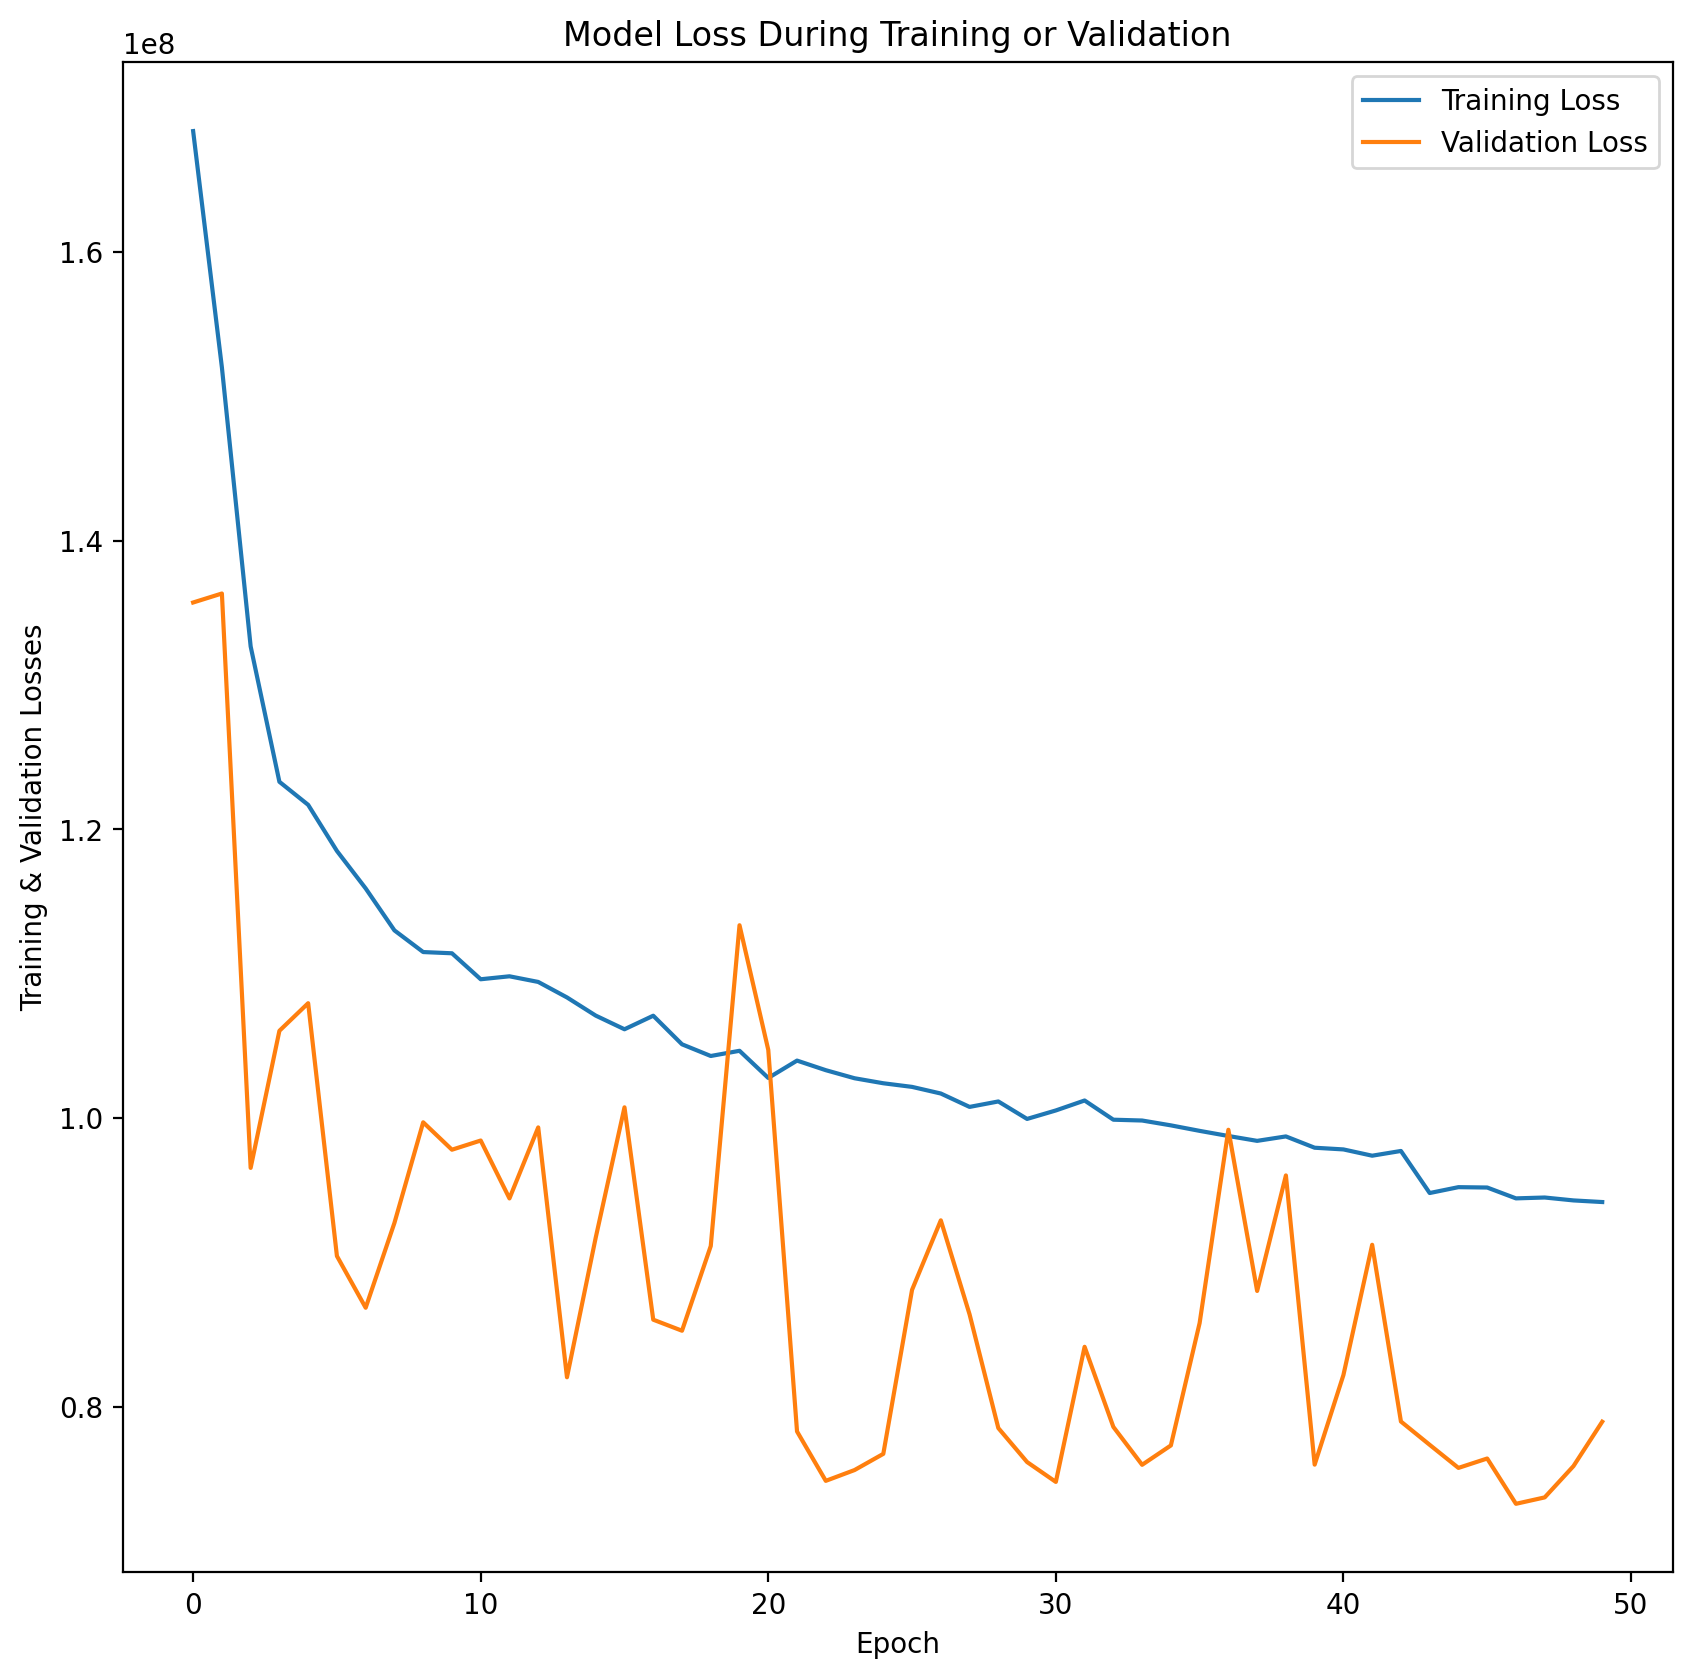

In [57]:
plt.figure(figsize=(10,10),dpi=200)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [58]:
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)
print(rmse_train)
print("R-squared:", r2)

4996/4996 [==============================] - 5s 1ms/step
8562.817349154218
R-squared: 0.6525009708471101


In [59]:
y_val_pred = model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
print(rmse_val)
print("R-squared:", r2)

1666/1666 [==============================] - 2s 1ms/step
8887.524796918058
R-squared: 0.6321512573314574


In [60]:
y_val_pred = pd.DataFrame(y_val_pred, columns = ['Predicted Val Output'])
ann_results = pd.concat([y_val_pred, y_val.to_frame().
                         reset_index(drop = True)], axis = 1, ignore_index = False)

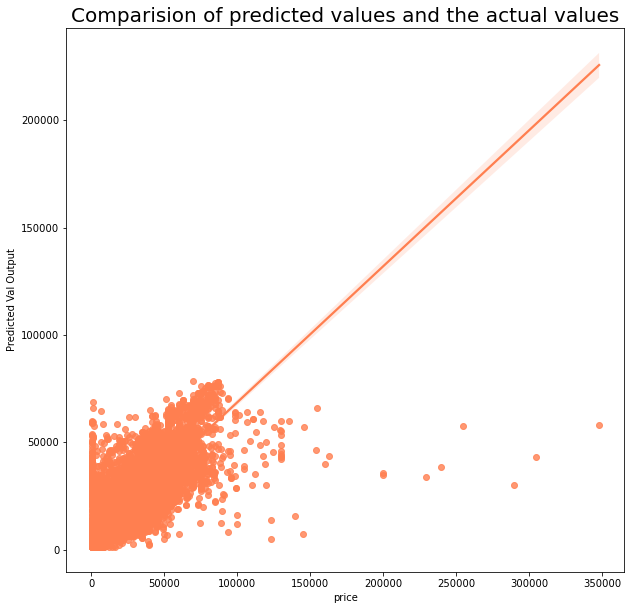

In [61]:
plt.figure(figsize = (10, 10))
sns.regplot(data = ann_results, y = 'Predicted Val Output', x = 'price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [22]:
# log transform


model1 = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(25, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='linear')
])

In [25]:
model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

In [23]:
# Log transform the target variable
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

In [26]:
history = model1.fit(X_train, y_train_log, batch_size=16, validation_data=(X_val, y_val_log), epochs=50)

Epoch 1/50
9991/9991 [==============================] - 31s 3ms/step - loss: 1228.6737 - val_loss: 0.8890
Epoch 2/50
9991/9991 [==============================] - 36s 4ms/step - loss: 2.3227 - val_loss: 0.4648
Epoch 3/50
9991/9991 [==============================] - 31s 3ms/step - loss: 0.5999 - val_loss: 0.4648
Epoch 4/50
9991/9991 [==============================] - 29s 3ms/step - loss: 0.5328 - val_loss: 0.4658
Epoch 5/50
9991/9991 [==============================] - 30s 3ms/step - loss: 0.5630 - val_loss: 0.5240
Epoch 6/50
9991/9991 [==============================] - 26s 3ms/step - loss: 0.6838 - val_loss: 0.7148
Epoch 7/50
9991/9991 [==============================] - 29s 3ms/step - loss: 0.7142 - val_loss: 0.7148
Epoch 8/50
9991/9991 [==============================] - 26s 3ms/step - loss: 0.7142 - val_loss: 0.7149
Epoch 9/50
9991/9991 [==============================] - 26s 3ms/step - loss: 0.7143 - val_loss: 0.7151
Epoch 10/50
9991/9991 [==============================] - 28s 3ms/step 

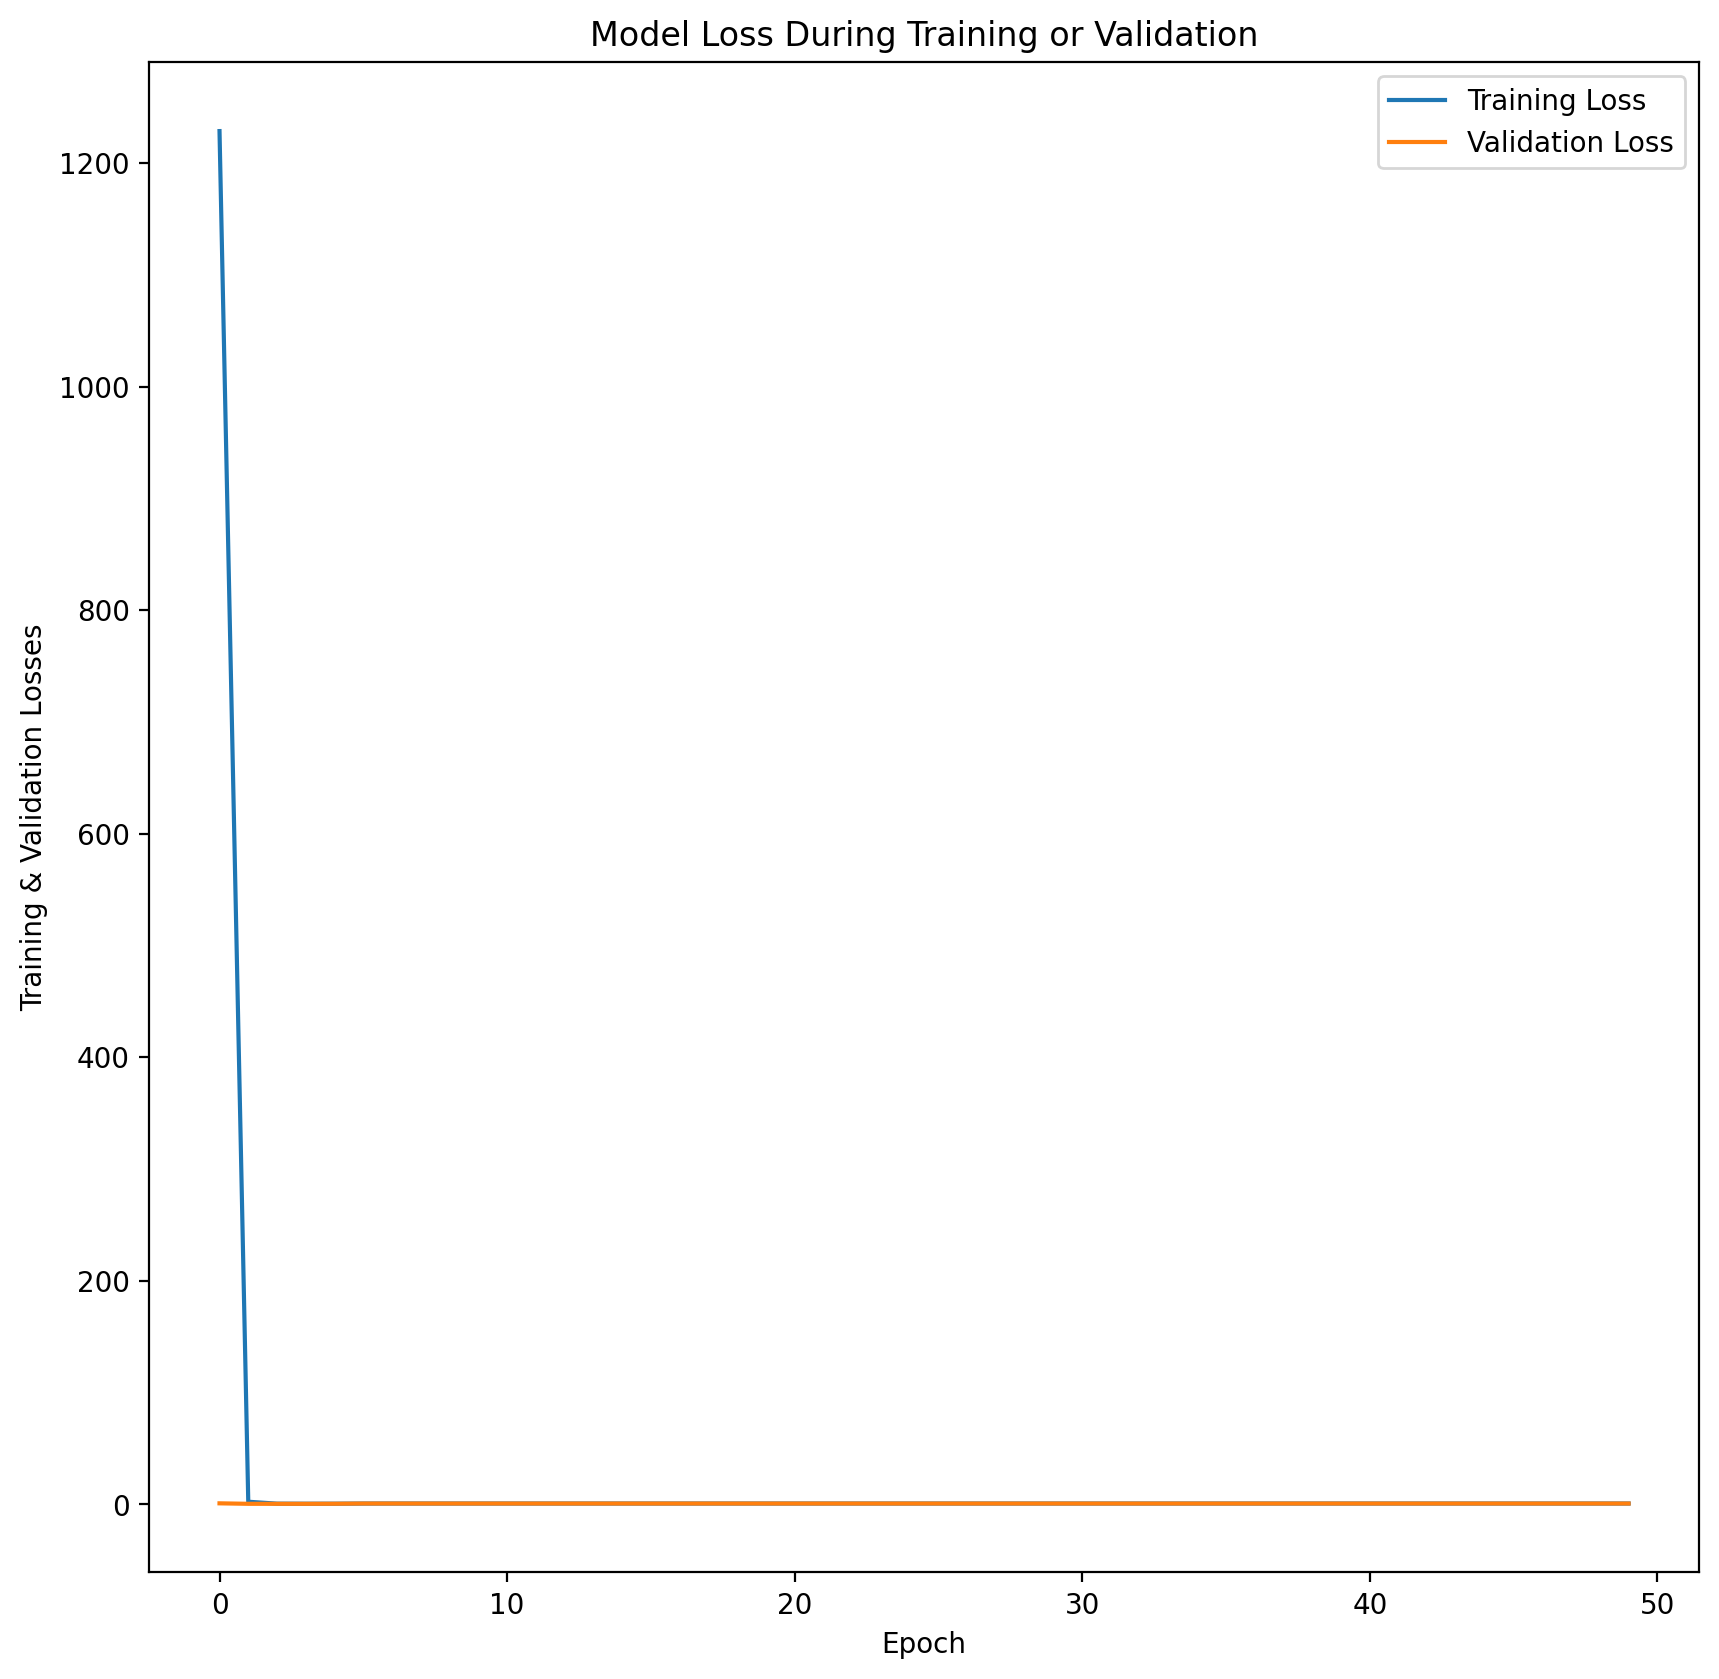

In [27]:
plt.figure(figsize=(10,10),dpi=200)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [28]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

1666/1666 [==============================] - 4s 3ms/step


In [29]:
predict_train = np.exp(y_train_pred)
predict_val = np.exp(y_val_pred)

In [30]:
rmse_train = np.sqrt(mean_squared_error(y_train, predict_train))
r2 = r2_score(y_train, predict_train)
print(rmse_train)
print("R-squared:", r2)

24965.11351628263
R-squared: -1.9538424345065755


# ANN Model 2

In [19]:
import tensorflow.keras as keras

# Create a Sequential model with two hidden dense layers of ELU neurons
# We must specify activation, kernel_initializer (for backpropagation stability)
# and input_shape for the first hidden layer(as a list)
ANN_model = keras.models.Sequential([
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal', 
                       input_shape=[X_train.shape[1]]),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear', kernel_initializer='glorot_normal')
])

# Show model summary
ANN_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               55400     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                

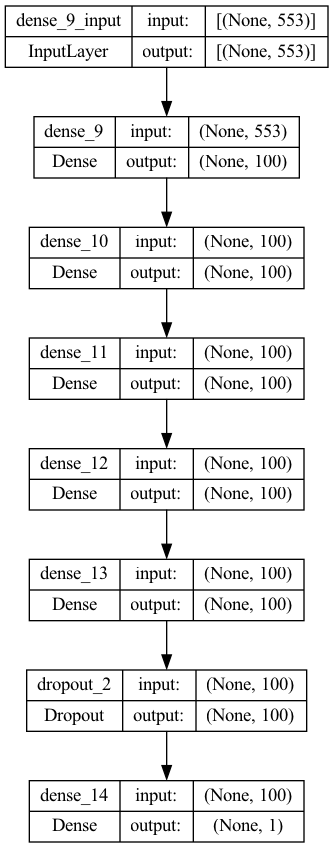

In [20]:
# plot model
keras.utils.plot_model(ANN_model, to_file='ANNModel.png', show_shapes=True)

In [21]:
import tensorflow.keras.backend as K

# Define R^2 metric as a custom metric
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Compile the model
# This is a regression problem, for which the loss function is mean squared error
# Specify the metrics as a list
ANN_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                  loss=keras.losses.mean_squared_error, 
                  metrics=[keras.metrics.RootMeanSquaredError(), 
                           keras.metrics.MeanAbsoluteError(), 
                           r_square])

# save the model
ANN_model.save('car_price_prediction_model.h5')

In [22]:
# Fit the model by passing the train and validation data
# class_weight is the parameter for weighing instances
# EarlyStopping stops the fitting when the validation performance does not improve
# for patience many epochs
history = ANN_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, callbacks=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True))

Epoch 1/100
4996/4996 [==============================] - 35s 7ms/step - loss: 153538288.0000 - root_mean_squared_error: 12391.0566 - mean_absolute_error: 8732.6855 - r_square: 0.2462 - val_loss: 134808512.0000 - val_root_mean_squared_error: 11610.7070 - val_mean_absolute_error: 7716.1885 - val_r_square: 0.3736
Epoch 2/100
4996/4996 [==============================] - 29s 6ms/step - loss: 138644944.0000 - root_mean_squared_error: 11774.7588 - mean_absolute_error: 8277.4736 - r_square: 0.3241 - val_loss: 115224088.0000 - val_root_mean_squared_error: 10734.2480 - val_mean_absolute_error: 7241.1914 - val_r_square: 0.4628
Epoch 3/100
4996/4996 [==============================] - 32s 6ms/step - loss: 116492672.0000 - root_mean_squared_error: 10793.1768 - mean_absolute_error: 7479.8623 - r_square: 0.4292 - val_loss: 91899816.0000 - val_root_mean_squared_error: 9586.4395 - val_mean_absolute_error: 6678.7559 - val_r_square: 0.5676
Epoch 4/100
4996/4996 [==============================] - 28s 6ms/s

In [8]:
import skopt

ModuleNotFoundError: No module named 'skopt'

In [12]:
from skopt import gp_minimize
from skopt.space import Real, Integer


In [13]:
search_space = [Real(0.01, 0.3, name='learning_rate'),
                Integer(50, 300, name='n_estimators'),
                Integer(1, 10, name='max_depth'),
                Integer(1, 10, name='min_child_weight'),
                Real(0.5, 1.0, name='subsample')]

In [32]:
def objective(params):
    learning_rate, n_estimators, max_depth, min_child_weight, subsample = params
    model = XGBRegressor(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

In [36]:
result = gp_minimize(objective, search_space, n_calls=10, random_state=42)

In [37]:
result

          fun: 4835.847941518292
    func_vals: array([5300.64146791, 6918.38644231, 5493.24199228, 7887.58954823,
       5344.35813279, 4835.84794152, 7936.34012284, 7345.65607945,
       6287.58195741, 6492.39265934])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1608637542)]
 random_state: RandomState(MT19937) at 0x226A4C12540
        space: Space([Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
       Integer(low=50, high=300, prior='uniform', transform='normalize'),
       Integer(low=1, high=10, prior='uniform', transform='normalize'),
       Integer(low=1, high=10, prior='uniform', transform='normalize'),
       Real(low=0.5, high=1.0, prior='uniform', transform='normalize')])
        specs: {'args': {'func': <function objective at 0x00000226A36788B0>, 'dime